# Food Clustering


The purpose of this notebook is explore if there are any hidden relationships between foods based on a few common nutrients.

In [40]:
#warnings :)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


## 1. Reading in the Data

In [41]:
## Read in csv file
df = pd.read_csv('alldata.csv')

In [42]:
#check the data
df.head()

,ID,NDB_No,Shrt_Desc,Long_Desc,Water_g,Energ_Kcal,Protein_g,Lipid_Tot_g,Ash_g,Carbohydrt_g,...,FA_Mono_g,FA_Poly_g,Cholestrl_mg,GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,My_Food,creator
0,1,1001,"BUTTER,WITH SALT","Butter, salted",15.87,717,0.85,81.11,2.11,0.06,...,21.021,3.043,215,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0,0,NaN
1,2,1002,"BUTTER,WHIPPED,W/ SALT","Butter, whipped, with salt",16.72,718,0.49,78.30,1.62,2.87,...,19.874,3.331,225,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0,0,NaN
2,3,1003,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",0.24,876,0.28,99.48,0.00,0.00,...,28.732,3.694,256,12.80,1 tbsp,205.0,1 cup,0,0,NaN
3,4,1004,"CHEESE,BLUE","Cheese, blue",42.41,353,21.40,28.74,5.11,2.34,...,7.778,0.800,75,28.35,1 oz,17.0,1 cubic inch,0,0,NaN
4,5,1005,"CHEESE,BRICK","Cheese, brick",41.11,371,23.24,29.68,3.18,2.79,...,8.598,0.784,94,132.00,"1 cup, diced",113.0,"1 cup, shredded",0,0,NaN


In [43]:
# Check the shape of the data
df.shape

(8789, 57)

So we have 8,789 rows and 57 columns

## 2. Exploratory Data Analysis

### Checking for missing values
From observation I see that I have all the values. Some of these values are zero. I would expect that all the nutrients datatypes would be floats, but I am also seeing some ints. It is also observed that there are a few columns that I am not interested in for this purpose (since we are clustering based on the foods nutrients)...eg. GmWt. The Refuse_pct is the portion of inedible portion of the food in percentage and seems to have a large number of zeros, but we will keep that in mind. Let's keep it for now.

In [44]:
#check basic information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8789 non-null   int64  
 1   NDB_No            8789 non-null   int64  
 2   Shrt_Desc         8789 non-null   object 
 3   Long_Desc         8789 non-null   object 
 4   Water_g           8789 non-null   float64
 5   Energ_Kcal        8789 non-null   int64  
 6   Protein_g         8789 non-null   float64
 7   Lipid_Tot_g       8789 non-null   float64
 8   Ash_g             8789 non-null   float64
 9   Carbohydrt_g      8789 non-null   float64
 10  Fiber_TD_g        8789 non-null   float64
 11  Sugar_Tot_g       8789 non-null   float64
 12  Calcium_mg        8789 non-null   int64  
 13  Iron_mg           8789 non-null   float64
 14  Magnesium_mg      8789 non-null   int64  
 15  Phosphorus_mg     8789 non-null   int64  
 16  Potassium_mg      8789 non-null   int64  


### Dropping Columns

In [45]:
# Drop the columns of no interest
columns_to_drop = ['ID','NDB_No', 'Long_Desc','GmWt_1','GmWt_2', 'GmWt_Desc1', 'GmWt_Desc2','My_Food','creator']
df = df.drop(columns_to_drop, axis=1)

In [46]:
# check again
df.head()

,Shrt_Desc,Water_g,Energ_Kcal,Protein_g,Lipid_Tot_g,Ash_g,Carbohydrt_g,Fiber_TD_g,Sugar_Tot_g,Calcium_mg,...,LutZea_mu_g,Vit_E_mg,Vit_D_mu_g,Vit_D_IU,Vit_K_mu_g,FA_Sat_g,FA_Mono_g,FA_Poly_g,Cholestrl_mg,Refuse_Pct
0,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24,...,0,2.32,0.0,0,7.0,51.368,21.021,3.043,215,0
1,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23,...,13,1.37,0.0,0,4.6,45.390,19.874,3.331,225,0
2,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4,...,0,2.80,0.0,0,8.6,61.924,28.732,3.694,256,0
3,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528,...,0,0.25,0.5,21,2.4,18.669,7.778,0.800,75,0
4,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674,...,0,0.26,0.5,22,2.5,18.764,8.598,0.784,94,0


In [47]:
# Get Columns except Shrt_Desc so that we can only scale those values
col_names = df.columns[1:]

In [48]:
### Scaling Columns
from sklearn.preprocessing import MinMaxScaler

#copy the dataframe
df_scaled = df.copy()
features = df_scaled[col_names]

scaler = MinMaxScaler()
features = scaler.fit_transform(features.values)
df_scaled[col_names] = features
print("Scaled DataSet")
df_scaled



Scaled DataSet


,Shrt_Desc,Water_g,Energ_Kcal,Protein_g,Lipid_Tot_g,Ash_g,Carbohydrt_g,Fiber_TD_g,Sugar_Tot_g,Calcium_mg,...,LutZea_mu_g,Vit_E_mg,Vit_D_mu_g,Vit_D_IU,Vit_K_mu_g,FA_Sat_g,FA_Mono_g,FA_Poly_g,Cholestrl_mg,Refuse_Pct
0,"BUTTER,WITH SALT",0.1587,0.794900,0.009624,0.8111,0.021142,0.0006,0.0,0.000601,0.003259,...,0.00000,0.015529,0.0000,0.0000,0.004083,0.537322,0.251180,0.040778,0.069355,0.0
1,"BUTTER,WHIPPED,W/ SALT",0.1672,0.796009,0.005548,0.7830,0.016232,0.0287,0.0,0.000601,0.003123,...,0.00066,0.009170,0.0000,0.0000,0.002683,0.474791,0.237474,0.044638,0.072581,0.0
2,"BUTTER OIL,ANHYDROUS",0.0024,0.971175,0.003170,0.9948,0.000000,0.0000,0.0,0.000000,0.000543,...,0.00000,0.018742,0.0000,0.0000,0.005016,0.647741,0.343319,0.049502,0.082581,0.0
3,"CHEESE,BLUE",0.4241,0.391353,0.242301,0.2874,0.051202,0.0234,0.0,0.005010,0.071700,...,0.00000,0.001673,0.0020,0.0021,0.001400,0.195282,0.092939,0.010721,0.024194,0.0
4,"CHEESE,BRICK",0.4111,0.411308,0.263134,0.2968,0.031864,0.0279,0.0,0.005110,0.091526,...,0.00000,0.001740,0.0020,0.0022,0.001458,0.196276,0.102738,0.010506,0.030323,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"MACKEREL,SALTED",0.4300,0.338137,0.209466,0.2510,0.134269,0.0000,0.0,0.000000,0.008963,...,0.00000,0.015930,0.1008,0.1006,0.004549,0.074770,0.099416,0.083218,0.030645,0.0
8785,"SCALLOP,(BAY&SEA),CKD,STMD",0.7025,0.123060,0.232563,0.0084,0.029760,0.0541,0.0,0.000000,0.001358,...,0.00000,0.000000,0.0000,0.0002,0.000000,0.002280,0.000980,0.002975,0.013226,0.0
8786,"SYRUP,CANE",0.2600,0.298226,0.000000,0.0000,0.008617,0.7314,0.0,0.733467,0.001765,...,0.00000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8787,"SNAIL,RAW",0.7920,0.099778,0.182292,0.0140,0.013026,0.0200,0.0,0.000000,0.001358,...,0.00000,0.033467,0.0000,0.0000,0.000058,0.003776,0.003095,0.003377,0.016129,0.0


## 3. K-Means Clustering

K-means is a centroid-based algorithm/distance-based algorithm. The distances are calculaed and points are assigned to a cluster. 
Steps:
- Choose k clusters
- Select k random points as centroids (There are other ways to start)
- Assign all the points to the closest centroid
- Recalculate centroids with the new clusters
- Repeat assigning and recalculating (last two steps above)

### Finding the optimum numbers of clusters for K-Means algorithm
Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. Therefore a good model is one with low inertia AND a low number of clusters ( K ).

In [49]:
from sklearn.cluster import KMeans

wcss = [] #within clusters of sum of squares
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)



#### Using the elbow method to determine the optimal number of clusters for k-means clustering. After plotting,the choice would be at the 'elbow' of the curve. That would be where the inertia start decreasing linearly. In the graph, there 

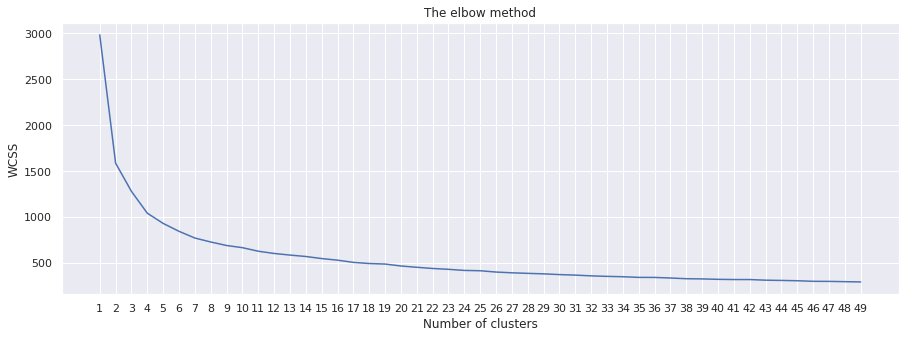

In [50]:
plt.figure(figsize=(15,5))
plt.plot(range(1, 50), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.xticks(range(1, 50))
plt.show()

### Implementing K-Means with 20 clusters

In [51]:
kmeans = KMeans(n_clusters = 20, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(features)



In [52]:
#for y in y_kmeans:
#    print(y)
#print(len(kmeans.cluster_centers_))
#print(kmeans.labels_)
#print(y_kmeans)
#print(features[y_kmeans == 0,0])
#print(features)


### Reduce the dimensions using PCA 
The plan is to see if we can reduce the dimensions to 3 so we can visualize of plot

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(features)
X_components=pca.transform(features)

In [54]:
X_components

array([[ 0.49515475,  0.87518381],
       [ 0.49612158,  0.82906265],
       [ 0.71141884,  1.10308543],
       ...,
       [ 0.58113245, -0.48730719],
       [-0.35391209, -0.02696704],
       [-0.38096867, -0.01410189]])

Store components in Pandas Dataframe

In [55]:
components_df = pd.DataFrame({'component_one': list(X_components[:,0]), 'component_two': list(X_components[:,1]) })

print(components_df.head())

   component_one  component_two
0       0.495155       0.875184
1       0.496122       0.829063
2       0.711419       1.103085
3       0.058801       0.343313
4       0.078955       0.362007


In [56]:
#features

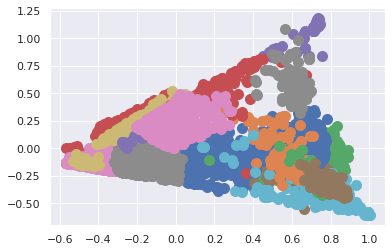

In [57]:
for i in range(20):
    plt.scatter(X_components[y_kmeans == i, 0], X_components[y_kmeans == i, 1], s=100)

In [58]:
df_scaled['Shrt_Desc']

0                 BUTTER,WITH SALT
1           BUTTER,WHIPPED,W/ SALT
2             BUTTER OIL,ANHYDROUS
3                      CHEESE,BLUE
4                     CHEESE,BRICK
                   ...            
8784               MACKEREL,SALTED
8785    SCALLOP,(BAY&SEA),CKD,STMD
8786                    SYRUP,CANE
8787                     SNAIL,RAW
8788              TURTLE,GREEN,RAW
Name: Shrt_Desc, Length: 8789, dtype: object

In [59]:
components_df['Food'] = df_scaled['Shrt_Desc']

In [60]:
components_df.head()

,component_one,component_two,Food
0,0.495155,0.875184,"BUTTER,WITH SALT"
1,0.496122,0.829063,"BUTTER,WHIPPED,W/ SALT"
2,0.711419,1.103085,"BUTTER OIL,ANHYDROUS"
3,0.058801,0.343313,"CHEESE,BLUE"
4,0.078955,0.362007,"CHEESE,BRICK"


In [61]:
#convert y_kmeans to dataframe
y_kmeans_df = pd.DataFrame({'clusters': y_kmeans})
#y_kmeans


In [62]:
components_df['clusters'] = y_kmeans_df['clusters']

In [63]:
components_df.groupby('clusters').head(60)

,component_one,component_two,Food,clusters
0,0.495155,0.875184,"BUTTER,WITH SALT",4
1,0.496122,0.829063,"BUTTER,WHIPPED,W/ SALT",4
2,0.711419,1.103085,"BUTTER OIL,ANHYDROUS",4
3,0.058801,0.343313,"CHEESE,BLUE",16
4,0.078955,0.362007,"CHEESE,BRICK",16
...,...,...,...,...
8322,-0.232734,0.058893,"MOOSE,LIVER,BRSD (ALASKA NATIVE)",14
8431,-0.416407,-0.143352,"STINGING NETTLES,BLANCHED (NORTHERN PLAINS IND...",18
8709,0.757709,-0.420594,"BEVER,FRUIT-FLAV DRK,PDR,W/ HI VIT C W/ OTHER ...",12
8723,-0.506313,-0.138141,"TURNIP GRNS,CND,NO SALT",18


In [64]:
components_df[components_df['clusters'] == 0]

,component_one,component_two,Food,clusters
66,0.128961,0.069821,"DESSERT TOPPING,SEMI SOLID,FRZ",0
142,0.102591,-0.018728,"CHEESE SUB,MOZZARELLA",0
174,0.163311,-0.126355,"CREAM SUB,FLAV,LIQ",0
201,0.163541,0.088337,"ICE CRM,BAR OR STK,CHOC COVERED",0
202,0.139736,-0.140446,ICE CRM SNDWCH,0
...,...,...,...,...
8705,0.039669,0.037958,"SALAD DRSNG,MAYO & MAYONNAISE-TYPE,LO CAL",0
8738,0.315524,-0.174602,"ROLLS,PUMPERNICKEL",0
8747,0.228804,-0.000779,"ICE CRM BAR,CHOC OR CARAMEL COVERED,W/NUTS",0
8776,0.160483,-0.349987,"JELLIES,RED SUGAR,HOME PRESERVED",0


In [65]:
components_df[components_df['clusters'] == 15].sample(20)

,component_one,component_two,Food,clusters
1968,0.793590,-0.389855,"CEREALS RTE,KELLOGG'S,RED SUGAR FRSTD FLAKES CRL",15
1882,0.804385,-0.232046,"CEREALS RTE,GENERAL MILLS,REESE'S PUFFS",15
1776,0.851401,-0.408421,"CEREALS RTE,KELLOGG,KELLOGG'S APPL JACKS",15
2086,0.799816,-0.244181,"CEREALS RTE,GENERAL MILLS,FRSTD TOAST CRUNCH",15
2062,0.790539,-0.252400,"CEREALS RTE,KELLOGG'S KRAVE CHOC CRL",15
1971,0.868248,-0.453942,"CEREALS RTE,MALT-O-MEAL,GOLDEN PUFFS",15
1815,0.734288,-0.256820,"CEREALS RTE,KELLOGG,KELLOGG'S SPL K",15
1811,0.724920,-0.370907,"CEREALS RTE,POST RAISIN BRAN CRL",15
2063,0.754238,-0.298391,"CEREALS RTE,KELLOGG'S RICE KRISPIES,GLUTEN FREE",15
1820,0.725019,-0.240051,"CEREALS RTE,RALSTON TASTEEOS",15


In [66]:
components_df[components_df['clusters'] == 10].sample(20)

,component_one,component_two,Food,clusters
7722,0.755485,0.077699,"SNACKS,PLANTAIN CHIPS,SALTED",10
6084,0.737757,0.043411,"POTATO CHIPS,MADE FROM DRIED POTATOES,LT",10
8133,0.700838,-0.019881,"CRACKERS,FLAV,FISH-SHAPED",10
6398,0.736265,0.204088,"SNACKS,CORN-BASED,EXTRDD,PUFFS OR TWISTS,CHEES...",10
6002,0.486253,-0.044329,"BREAD,POUND CAKE TYPE,PAN DE TORTA SALVADORAN",10
8128,0.645374,0.049486,"CRACKERS,WHL GRAIN,SANDWICH-TYPE,W/ PNUT BUTTE...",10
6024,0.700690,-0.065404,"KASHI,TLC,COUNTRY CHEDDAR CRACKERS",10
8527,0.558444,0.089399,"RESTAURANT,LATINO,BUNUELOS (FRIED YEAST BREAD)",10
5675,0.731386,0.039431,"COOKIES,CHOC CHIP,DRY MIX",10
6082,0.706476,0.128097,"POTATO CHIPS,BARBECUE-FLAVOR",10


In [67]:
components_df[components_df['clusters'] == 8].sample(20)

,component_one,component_two,Food,clusters
2548,-0.201262,0.245511,"PORK,FRSH,SHLDR,WHL,LN&FAT,RAW",8
2519,-0.226898,0.196887,"PORK,FRSH,LOIN,CNTR LOIN (CHOPS),BONE-IN,LN,CK...",8
5305,-0.412100,0.039987,"VEAL,VAR MEATS&BY-PRODUCTS,LUNGS,RAW",8
7656,-0.344387,0.102123,"BEEF,BRISKET,FLAT HALF,LN,1/8"" FAT,CHOIC,RAW",8
7630,-0.225484,0.165661,"BEEF,TENDERLOIN,STEAK,LN,1/8"" FAT,SEL,CKD,BRLD",8
889,-0.070853,0.224642,"CHICKEN,BROILERS OR FRYERS,DRUMSTK,MEAT&SKN,CK...",8
5129,-0.014296,0.423977,"LAMB,DOM,RIB,LN&FAT,1/4""FAT,CHOIC,CKD,RSTD",8
5380,-0.239996,0.206838,"LAMB,AUS,IMP,FRSH,COMP OF RTL CUTS,LN,1/8""FAT,CKD",8
955,-0.203357,0.243485,"CHICKEN,CAPONS,MEAT&SKN&GIBLETS&NECK,RAW",8
5423,-0.173359,0.288090,"LAMB,AUS,IMP,FRSH,SHLDR,BLADE,LN&FAT,1/8""FAT,RAW",8


In [68]:
components_df[components_df['clusters'] == 3].sample(20)

,component_one,component_two,Food,clusters
861,-0.382581,0.113796,"CHICKEN,BROILERS OR FRYERS,LT MEAT,MEAT ONLY,RAW",3
1148,-0.236759,0.269528,"CHICKEN,BROILER,ROTISSERIE,BBQ,BACK MEAT ONLY",3
953,-0.338464,0.193301,"CHICKEN,STEWING,DK MEAT,MEAT ONLY,RAW",3
5188,-0.378678,0.092406,"VEAL,COMP OF RTL CUTS,LN,RAW",3
1137,-0.406751,0.138144,"CHICKEN,DK MEAT,THIGH,MEAT ONLY,W/ ADDED SOLN,RAW",3
2550,-0.334827,0.151378,"PORK,FRSH,SHLDR,WHL,LN,RAW",3
875,-0.391077,0.200420,"CHICKEN,BROILERS OR FRYERS,BACK,MEAT ONLY,RAW",3
2711,-0.317496,0.130521,"PORK,CURED,HAM & H2O PRODUCT,SHANK,BONE-IN,LN,...",3
1007,-0.393459,0.118005,"Turkey from whole, dark meat, meat only, raw",3
948,-0.183895,0.290103,"CHICKEN,STEWING,MEAT ONLY,CKD,STWD",3


## Reduce the dimensions using t-SNE

In [69]:
from sklearn.manifold import TSNE

# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(features)

In [70]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y_kmeans})

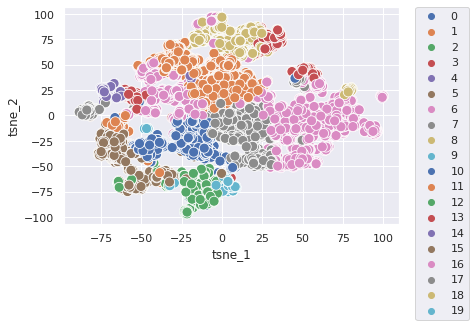

In [71]:
#Plot results of dimensions
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue= 'label', palette="deep", data=tsne_result_df, ax=ax,s=100)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [72]:
tsne_result_df

,tsne_1,tsne_2,label
0,-59.838112,24.094391,4
1,-59.729778,23.944572,4
2,-68.631462,29.070753,4
3,-45.222607,4.432786,16
4,-46.035431,4.189825,16
...,...,...,...
8784,-43.404083,24.341492,16
8785,7.906796,17.508190,1
8786,3.685281,-65.006187,9
8787,16.329937,17.670652,1


In [73]:
#insert series at specific index
tsne_result_df.insert(2, 'food', df_scaled['Shrt_Desc'])

In [74]:
tsne_result_df.head()

,tsne_1,tsne_2,food,label
0,-59.838112,24.094391,"BUTTER,WITH SALT",4
1,-59.729778,23.944572,"BUTTER,WHIPPED,W/ SALT",4
2,-68.631462,29.070753,"BUTTER OIL,ANHYDROUS",4
3,-45.222607,4.432786,"CHEESE,BLUE",16
4,-46.035431,4.189825,"CHEESE,BRICK",16


In [75]:
tsne_result_df[tsne_result_df['label'] == 0]

,tsne_1,tsne_2,food,label
66,-29.477898,-18.751707,"DESSERT TOPPING,SEMI SOLID,FRZ",0
142,-16.839563,-6.328802,"CHEESE SUB,MOZZARELLA",0
174,0.307456,-44.071613,"CREAM SUB,FLAV,LIQ",0
201,-28.895134,-19.026567,"ICE CRM,BAR OR STK,CHOC COVERED",0
202,1.210051,-41.509102,ICE CRM SNDWCH,0
...,...,...,...,...
8705,-10.785640,-8.641398,"SALAD DRSNG,MAYO & MAYONNAISE-TYPE,LO CAL",0
8738,-17.567776,-36.162670,"ROLLS,PUMPERNICKEL",0
8747,-28.593660,-19.972668,"ICE CRM BAR,CHOC OR CARAMEL COVERED,W/NUTS",0
8776,6.155067,-52.047264,"JELLIES,RED SUGAR,HOME PRESERVED",0


In [76]:
tsne_result_df[tsne_result_df['label'] == 3].sample(20)

,tsne_1,tsne_2,food,label
5447,28.954838,63.639297,"VEAL,AUSTRALIAN,SHANK,FORE,BONE-IN,LN & FAT,RAW",3
1184,35.398453,71.315926,"TURKEY,WING,FROM WHL BIRD,MEAT ONLY,W/ ADDED S...",3
1039,21.930660,70.384361,"CHICKEN,CORNISH GAME HENS,MEAT&SKN,RAW",3
5386,30.835533,77.878059,"LAMB,AUS,IMP,FRSH,FORESHANK,LN,1/8""FAT,CKD,BRSD",3
2977,51.678215,38.491974,"JERUSALEM-ARTICHOKES,RAW",3
7315,35.268513,82.948997,"BEEF,RIB,BACK RIBS,BONE-IN,LN & FAT,0"" FAT,SEL...",3
2820,53.541878,46.897152,"ARTICHOKES,(GLOBE OR FRENCH),CKD,BLD,DRND,WO/SALT",3
974,26.137463,63.465733,"GUINEA HEN,MEAT ONLY,RAW",3
3593,57.055695,36.937958,"MALABAR SPINACH,COOKED",3
2390,5.716399,-61.538738,"TAMARINDS,RAW",3


## 4. Conclusion

It was observed that the clusters were basically aligned with how groups of food are organized for the most part. For example, sugary foods were grouped together, meat products were also grouped together. If you observe cluster 3, even though you have quite a number of meat products you also have some seeds, greens and beans. These meat products are different from cluster 8, where the meat products seems to be more of the fattier type. Since these leaner meats are clustered with seeds, greens and beans, it confirms as suggested by science that some plant-based foods can be good replacement for meat, at least in some aspects.